In [94]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




    




/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [95]:
def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # limit to meaningful columns

    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)

    plt.figure(figsize=(6 * nGraphPerRow, 4 * nGraphRow), dpi=80)
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            columnDf.value_counts().plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (col {i})')

    plt.tight_layout()
    plt.show()


In [108]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # Keep only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Drop columns with NaN values
    df_numeric = df_numeric.dropna(axis=1)

    # Drop columns with only one unique value (no variance)
    df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]

    if df_numeric.shape[1] < 2:
        print(f'No correlation plots shown: Not enough valid numeric columns ({df_numeric.shape[1]})')
        return

    # Compute correlation matrix
    corr = df_numeric.corr()

    # Plot
    plt.figure(figsize=(graphWidth, graphWidth))
    cax = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(cax)
    plt.title('Correlation Matrix for Womens Clothing E-Commerce Reviews.csv ', fontsize=15)
    plt.show()


In [114]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [115]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Womens Clothing E-Commerce Reviews.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Womens Clothing E-Commerce Reviews.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


In [116]:
df1.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


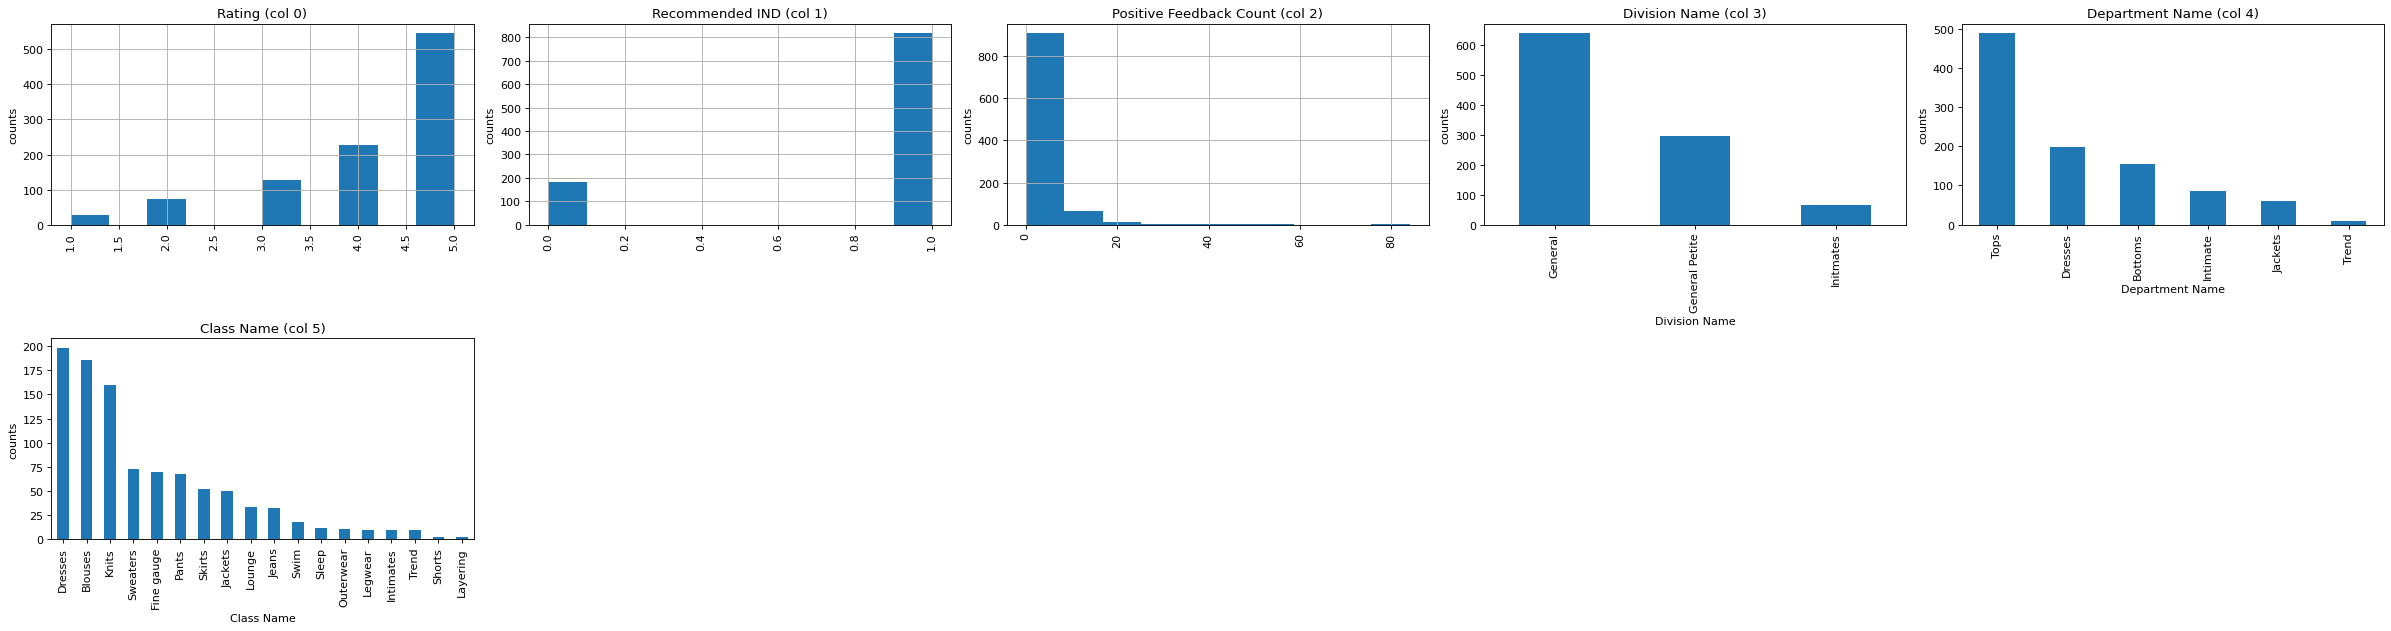

In [117]:
plotPerColumnDistribution(df1, 10, 5)

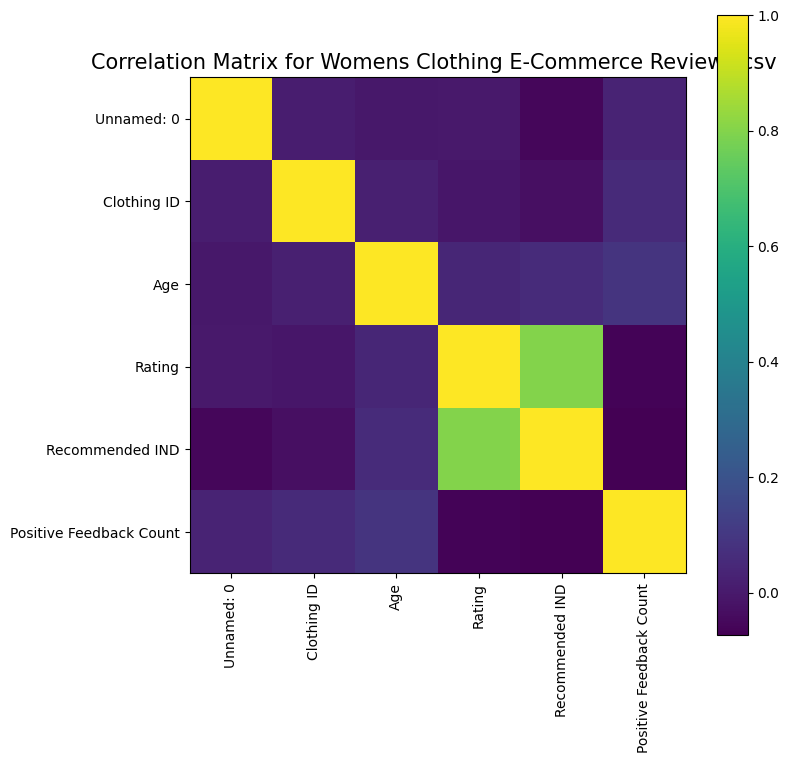

In [118]:
plotCorrelationMatrix(df1, 8)

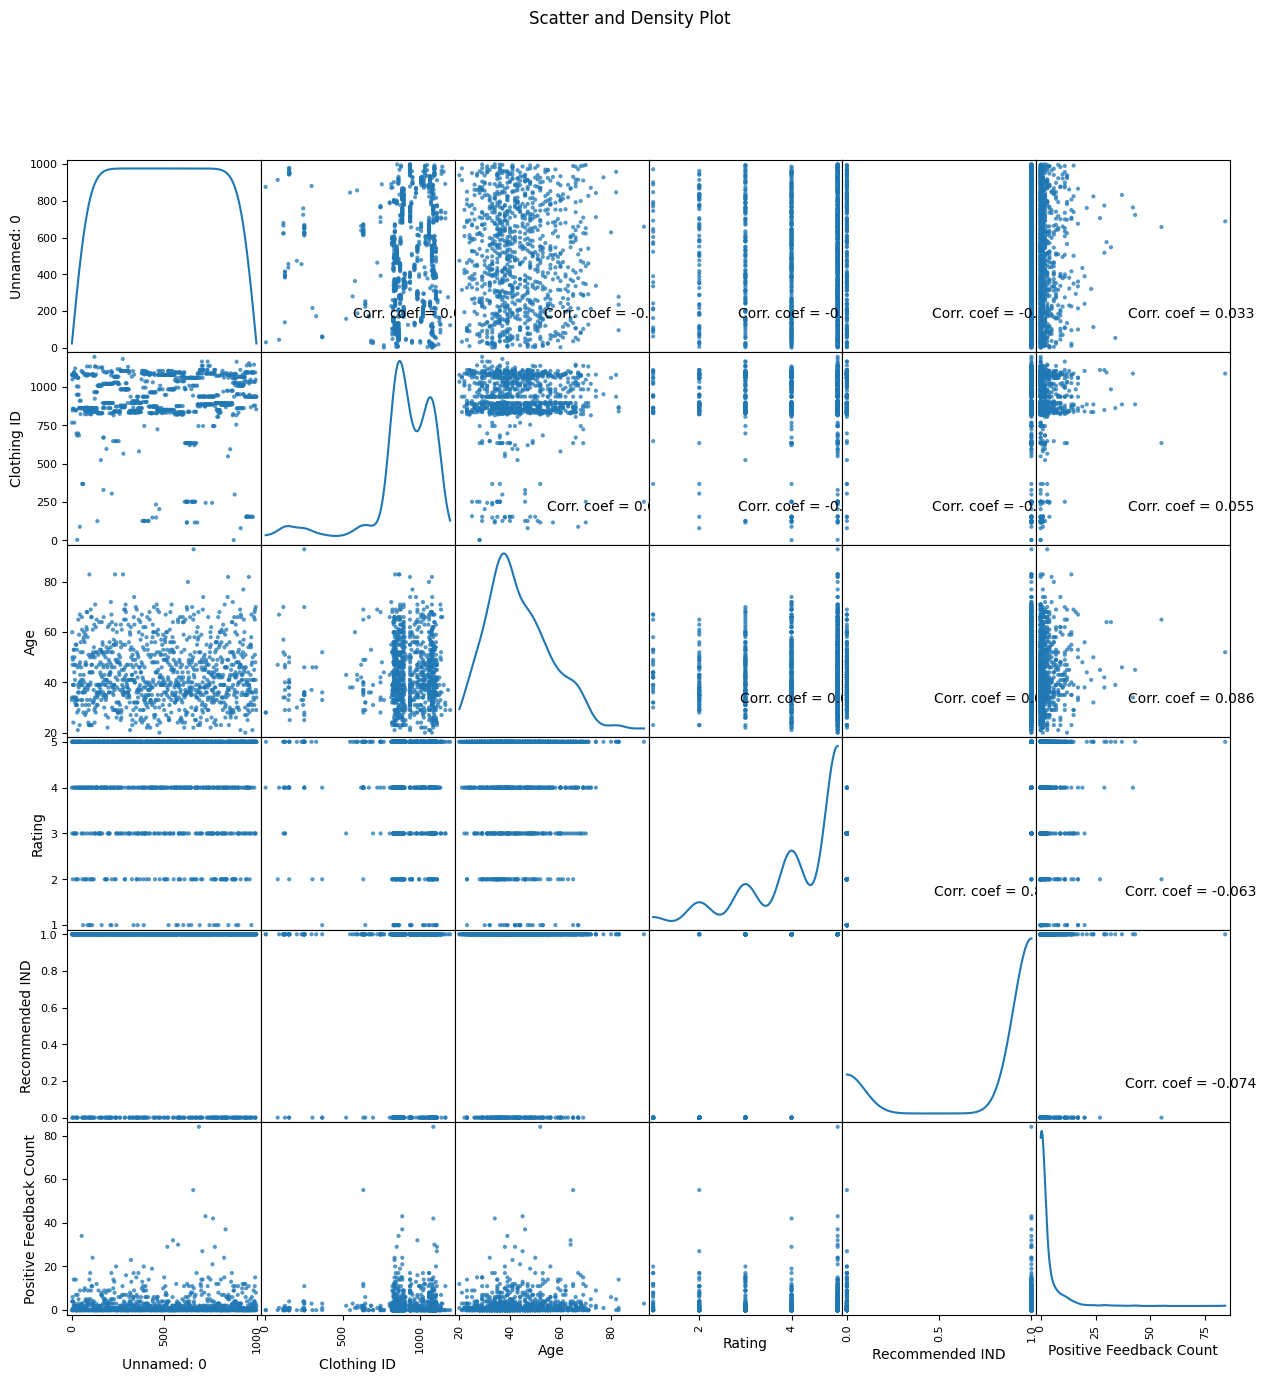

In [119]:
plotScatterMatrix(df1, 15, 10)